In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
img=cv2.imread("/Users/vigneshm/Documents/pictures/pentagon-graph.jpg")

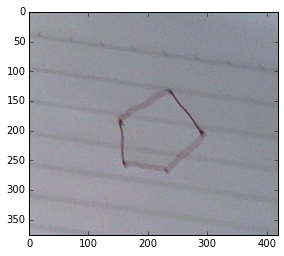

In [63]:
plt.imshow(img)

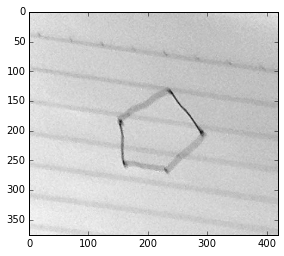

In [66]:
img_bw=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img_bw,cmap='gray')

In [67]:
ret,img_thresh=cv2.threshold(img_bw,130,255,cv2.THRESH_BINARY_INV)

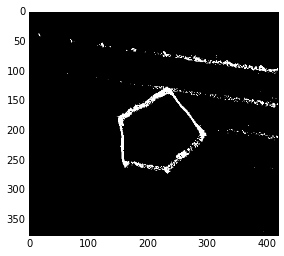

In [68]:
plt.imshow(img_thresh,cmap='gray')

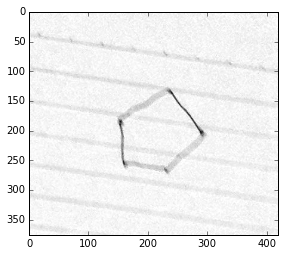

In [69]:
img_closed = cv2.morphologyEx(img_bw,cv2.MORPH_CLOSE,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(19,19)))
img_bw2 = np.float32(img_bw)/img_closed
img_bw2 = cv2.normalize(img_bw2,img_bw2,0,255,cv2.NORM_MINMAX,cv2.CV_8U)
img_thresh_2=cv2.threshold(img_bw2,
plt.imshow(img_bw2,cmap='gray')

In [61]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
img_morph=cv2.morphologyEx(img_thresh,cv2.MORPH_CLOSE,kernel)

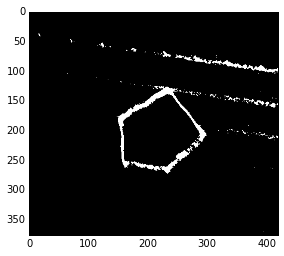

In [10]:
plt.imshow(img_morph,cmap='gray')

In [21]:
edges=cv2.Canny(img_bw,50,200)

In [22]:
img_bw[120:170,220:250][25]

array([134, 144, 147, 145, 147, 148, 147, 148, 150, 148, 146, 148, 148,
       143, 141, 144, 145, 142, 142, 145, 161, 142, 130,  88,  53,  73,
       127, 146, 139, 139], dtype=uint8)

In [25]:
corners=cv2.cornerHarris(img_bw,2,5,0.04)

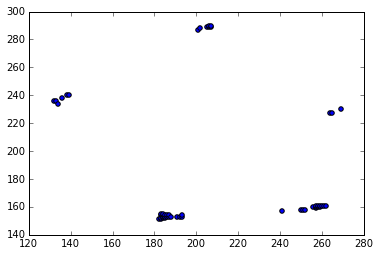

In [26]:
valid_c_x,valid_c_y=np.where(corners>0.1*corners.max())
plt.scatter(valid_c_x,valid_c_y)

In [27]:
max_c_x=valid_c_x.max();min_c_x=valid_c_x.min()
max_c_y=valid_c_y.max();min_c_y=valid_c_y.min()
tol=20
hist,xe,ye=np.histogram2d(valid_c_x,valid_c_y,(np.arange(min_c_x-tol,max_c_x+tol,tol),np.arange(min_c_y-tol,max_c_y+tol,tol)))

In [28]:
np.where(hist!=0)

(array([1, 3, 4, 4, 6, 7, 7]), array([5, 1, 1, 7, 1, 1, 4]))

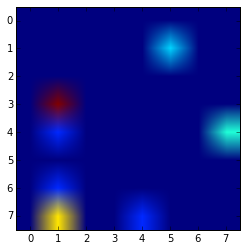

In [29]:
plt.imshow(hist)

In [30]:
from scipy.cluster.hierarchy import fclusterdata

In [31]:
clusters=fclusterdata(np.transpose((valid_c_x,valid_c_y)),5,criterion='distance')

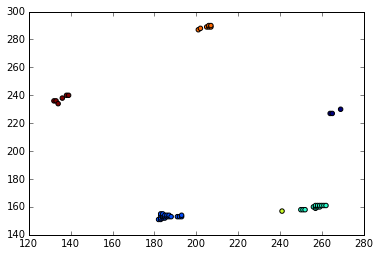

In [32]:
plt.scatter(valid_c_x,valid_c_y,c=clusters)

In [33]:
clustered_c=[]
for code in range(1,clusters.max()+1):
    code_corners=np.where(clusters==code)[0]
    if(code_corners.size<3):
        print 'discarding ',code_corners
    else:
        meanpos=np.array([int(valid_c_x[code_corners].mean()),int(valid_c_y[code_corners].mean())])
        print meanpos,code_corners.size
        clustered_c.append(meanpos)
clustered_c=np.array(clustered_c)
clustered_c

[266 228] 3
[186 153] 21
[256 159] 14
discarding  [34]
[204 288] 7
[135 237] 6


array([[266, 228],
       [186, 153],
       [256, 159],
       [204, 288],
       [135, 237]])

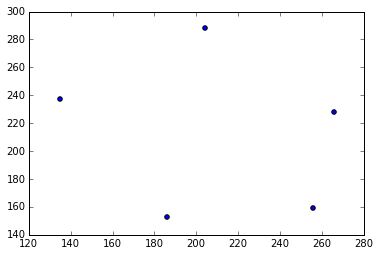

In [34]:
plt.scatter(clustered_c[...,0],clustered_c[...,1])

In [35]:
p1=clustered_c[0]
p2=clustered_c[1]
p1,p2

(array([266, 228]), array([186, 153]))

In [36]:
np.cross(p2,(0,0,1))
p2-p1

array([-80, -75])

In [41]:
def check_connected_rect(p1,p2):
    slope=p2-p1
    width=np.linalg.norm(slope)
    slope=slope/np.linalg.norm(slope)
    perp=np.cross(slope,(0,0,1))[0:2]
    area=[]
    for x in [-1,0,1]:
        area.append([p1+slope*m+x for m in np.arange(width)])
    area=np.array(area,dtype=int)
    rect=img_thresh[area[...,0],area[...,1]]
    return rect.sum()/(255*rect.size)
ch=check_connected_rect(p1,p2)
ch

0.14242424242424243

[266 228] [186 153] 0.142424242424
[266 228] [256 159] 0.6
[266 228] [204 288] 0.371647509579
[266 228] [135 237] 0.0808080808081
[186 153] [256 159] 0.924882629108
[186 153] [204 288] 0.0656934306569
[186 153] [135 237] 0.457912457912
[256 159] [204 288] 0.0928571428571
[256 159] [135 237] 0.0648148148148
[204 288] [135 237] 0.864341085271


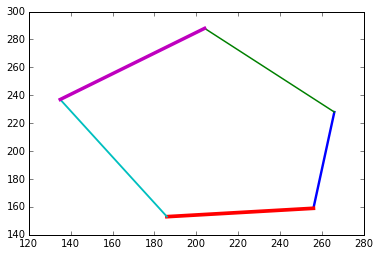

In [44]:
import itertools
for p1,p2 in itertools.combinations(clustered_c,2):
    ch=check_connected_rect(p1,p2)
    if ch>0.2: # has to be approx more than .33
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]],linewidth=4*ch)
    print p1,p2,ch

In [45]:
np.arange(-1,1)

array([-1,  0])

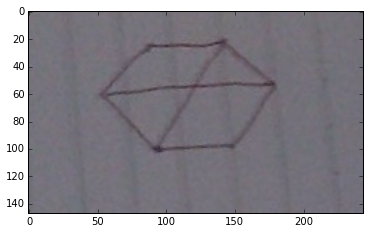

In [48]:
img=cv2.imread("/Users/vigneshm/Documents/pictures/hex-graph.jpg")
plt.imshow(img)

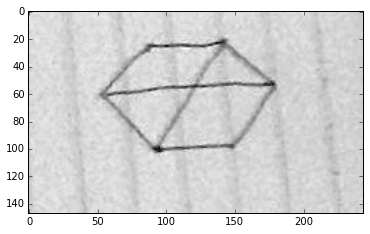

In [49]:
img_bw=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img_bw,cmap='gray')

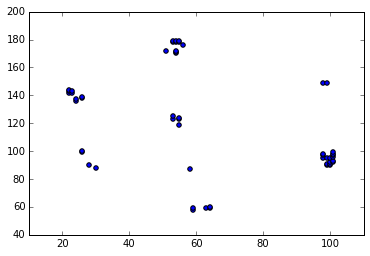

In [50]:
corners=cv2.cornerHarris(img_bw,2,5,0.04)
valid_c_x,valid_c_y=np.where(corners>0.1*corners.max())
plt.scatter(valid_c_x,valid_c_y)

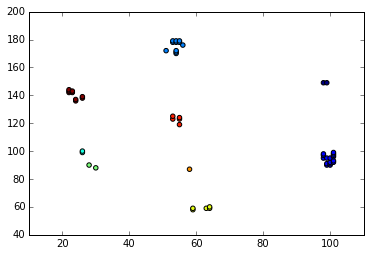

discarding  [38 42]
[99 94] 16
[ 53 175] 11
discarding  [7 8]
discarding  [11 12]
[61 59] 5
discarding  [29]
[ 54 122] 5
[ 23 140] 9


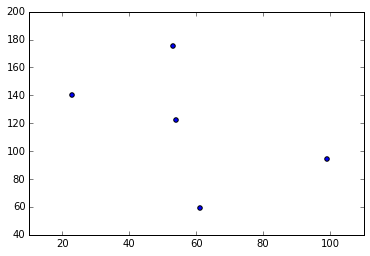

In [54]:
from scipy.cluster.hierarchy import fclusterdata
clusters=fclusterdata(np.transpose((valid_c_x,valid_c_y)),5,criterion='distance')
plt.scatter(valid_c_x,valid_c_y,c=clusters)
plt.show()
clustered_c=[]
for code in range(1,clusters.max()+1):
    code_corners=np.where(clusters==code)[0]
    if(code_corners.size<3):
        print 'discarding ',code_corners
    else:
        meanpos=np.array([int(valid_c_x[code_corners].mean()),int(valid_c_y[code_corners].mean())])
        print meanpos,code_corners.size
        clustered_c.append(meanpos)
clustered_c=np.array(clustered_c)
plt.scatter(clustered_c[...,0],clustered_c[...,1])